## Stroke Prediction

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [120]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from xgboost import XGBClassifier

from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [78]:
df= pd.read_csv("stroke_data.csv")

In [79]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Observation: Minimum value for Age is 0.08 and Maximum value is 82 years old

In [82]:
df[(df['age'] < 18) ]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


Observation: There are 856 rows with age less than 18

<AxesSubplot:xlabel='age', ylabel='Count'>

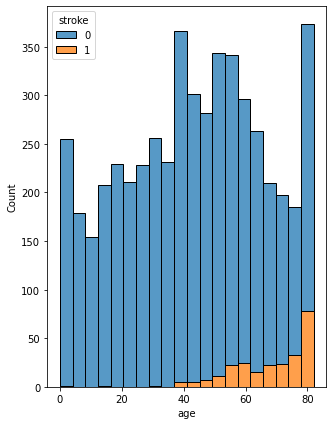

In [83]:
plt.rcParams['figure.figsize'] = 5, 7
sns.histplot(data= df, x ='age', hue= 'stroke', multiple='stack')

<AxesSubplot:xlabel='age', ylabel='stroke'>

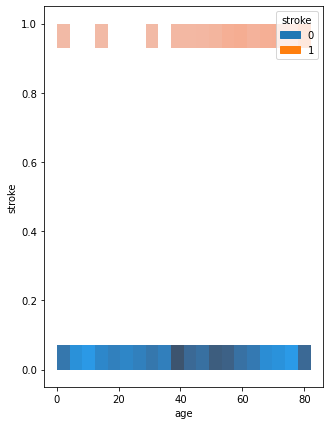

In [84]:
plt.rcParams['figure.figsize'] = 5, 7
sns.histplot(data= df, x ='age', y= 'stroke', hue= 'stroke')

In [85]:
df[(df['age'] < 18) & (df['stroke']==1) ]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


**Observation**: There are 2 stroke cases below the age of 18

**Aim**: To drop all rows with patients that are below 18 years old. According to Tsze & Valente (2011), A stroke or cerebral vascular accident (CVA) in children is typically considered to be a rare event. The reported incidence of combined ischemic and hemorrhagic pediatric stroke ranges from 1.2 to 13 cases per 100,000 children under 18 years of age 

In [86]:
df.drop(df[(df['age'] < 18)].index, inplace= True)

In [87]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  181
smoking_status         0
stroke                 0
dtype: int64

**Observation**: There are 201 missing rows in BMI

In [88]:
y = df['stroke']
print(f'Percentage of patient had a stroke: {round(y.value_counts(normalize=True)[1]*100,2)} % --> ({y.value_counts()[1]} patient)')
print(f'Percentage of patient did not have a stroke: {round(y.value_counts(normalize=True)[0]*100,2)} % --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: 5.81 % --> (247 patient)
Percentage of patient did not have a stroke: 94.19 % --> (4007 patient)


**Observation**: The outcome is imbalanced

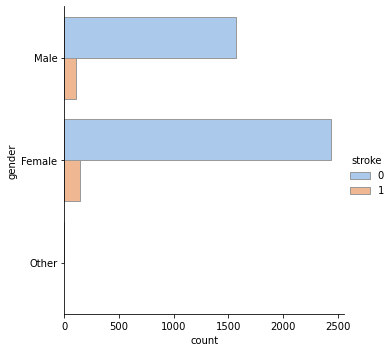

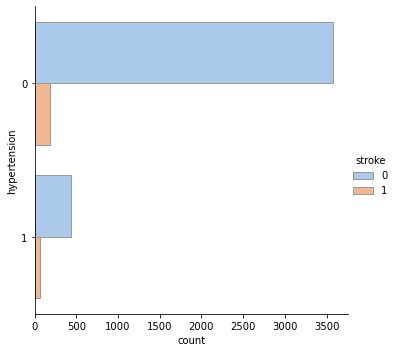

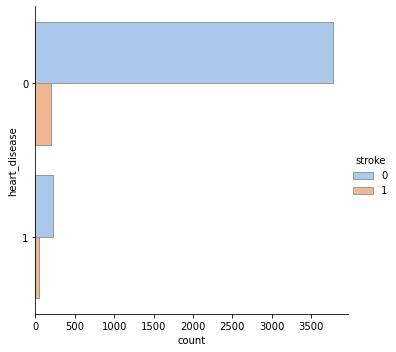

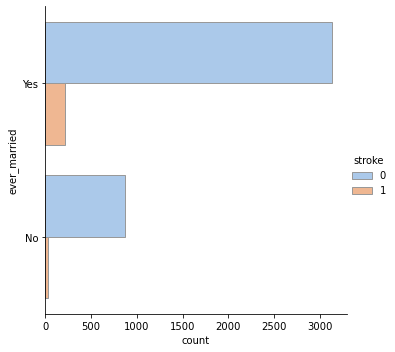

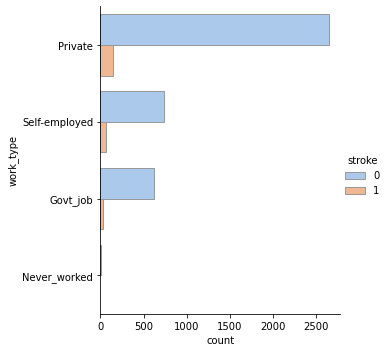

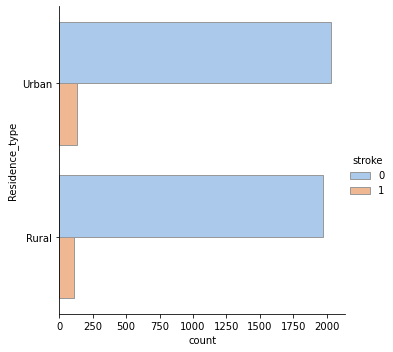

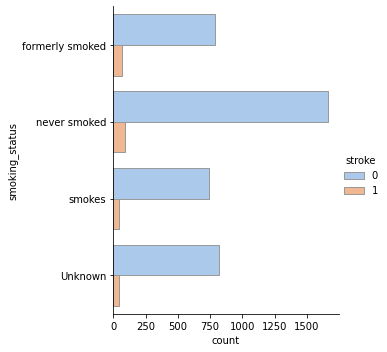

In [89]:
categoricals= ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
i=1
plt.rcParams['figure.figsize'] = 40, 60
for categorical in categoricals:
    sns.catplot(y=categorical, hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

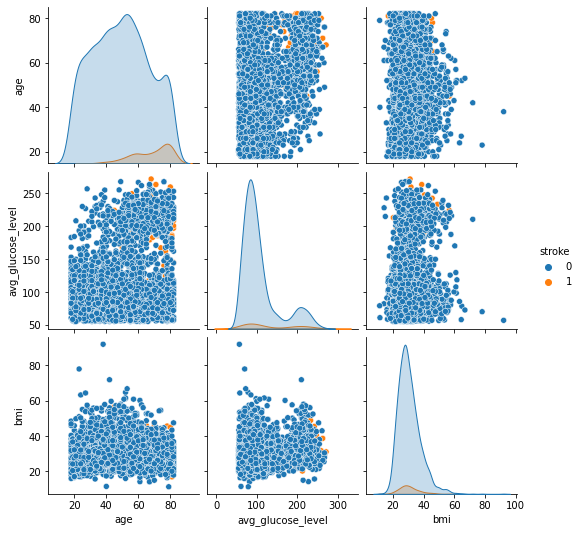

In [90]:
sns.pairplot(df,vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke')

In [91]:
smokes= ['smokes', 'formerly smoked', 'never smoked', 'Unknown']
for smoke in smokes:
    print (f'A person who falls under category of "{smoke}" has a probability of {round(df[df["smoking_status"]==smoke]["stroke"].mean()*100,2)} % get a stroke')

A person who falls under category of "smokes" has a probability of 5.38 % get a stroke
A person who falls under category of "formerly smoked" has a probability of 8.14 % get a stroke
A person who falls under category of "never smoked" has a probability of 5.14 % get a stroke
A person who falls under category of "Unknown" has a probability of 5.22 % get a stroke


In [92]:
Married= ['Yes', 'No']
for marry in Married:
    print (f'If the marriage status is "{marry}", patient has a probability of {round(df[df["ever_married"]==marry]["stroke"].mean()*100,2)} % get a stroke')

If the marriage status is "Yes", patient has a probability of 6.56 % get a stroke
If the marriage status is "No", patient has a probability of 3.0 % get a stroke


In [93]:
heart_disease= [1, 0]
for heart in heart_disease:
    print (f'If the heart disease status is "{heart}", patient has a probability of {round(df[df["heart_disease"]==heart]["stroke"].mean()*100,2)} % get a stroke')

If the heart disease status is "1", patient has a probability of 17.09 % get a stroke
If the heart disease status is "0", patient has a probability of 5.03 % get a stroke


In [94]:
hypertension= [1, 0]
for htn in hypertension:
    print (f'If the hypertension status is "{htn}", patient has a probability of {round(df[df["hypertension"]==htn]["stroke"].mean()*100,2)} % get a stroke')

If the hypertension status is "1", patient has a probability of 13.28 % get a stroke
If the hypertension status is "0", patient has a probability of 4.82 % get a stroke


In [95]:
genders= ['Male', 'Female', 'Other']
for gender in genders:
    print (f'A person who falls under category of "{gender}" has a probability of {round(df[df["gender"]==gender]["stroke"].mean()*100,2)} % get a stroke')

A person who falls under category of "Male" has a probability of 6.44 % get a stroke
A person who falls under category of "Female" has a probability of 5.4 % get a stroke
A person who falls under category of "Other" has a probability of 0.0 % get a stroke


In [96]:
works= ['Private','Self-employed', 'Govt_job', 'Never_worked']
for work in works:
    print (f'A person who falls under category of "{work}" has a probability of {round(df[df["work_type"]==work]["stroke"].mean()*100,2)} % get a stroke')

A person who falls under category of "Private" has a probability of 5.34 % get a stroke
A person who falls under category of "Self-employed" has a probability of 8.05 % get a stroke
A person who falls under category of "Govt_job" has a probability of 5.07 % get a stroke
A person who falls under category of "Never_worked" has a probability of 0.0 % get a stroke


In [97]:
residences= ['Urban', 'Rural']
for residence in residences:
    print (f'A person who falls under category of "{residence}" has a probability of {round(df[df["Residence_type"]==residence]["stroke"].mean()*100,2)} % get a stroke')

A person who falls under category of "Urban" has a probability of 6.18 % get a stroke
A person who falls under category of "Rural" has a probability of 5.42 % get a stroke


**Observation**: Person who lives in urban housing and is male, married, formerly smoked, self-employed and has a heart disease is most likely to have stroke

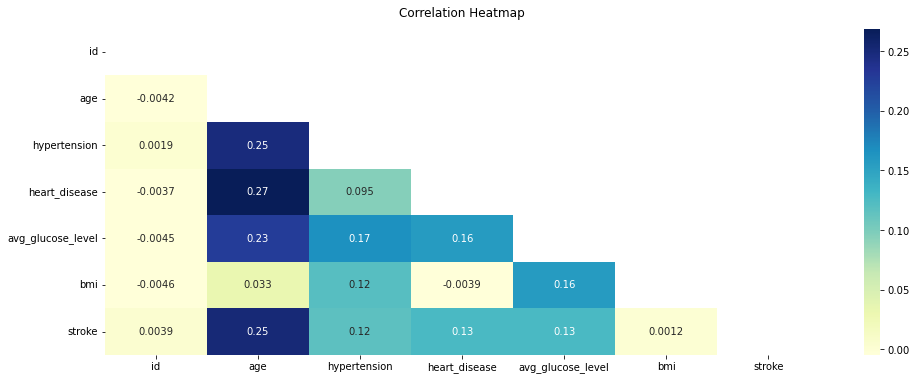

In [98]:
%matplotlib inline
#Visualising the correlation with heatmap

corr= df.corr()
plt.figure(figsize=(16, 6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap="YlGnBu",mask=mask, annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Observation**:

Age shows correlation with hypertension, heart disease, glucose level and stroke \
Hypertension, heart disease and glucose level shows weak correlation




2438


Text(0.5, 1.0, 'Distribution of stroke EVENT according to their gender')

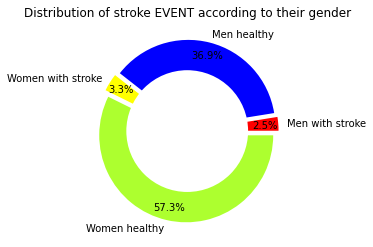

In [99]:
len_data = len(df)
len_m = len(df[df["gender"]=="Male"])
len_w = len_data - len_m

men_stroke = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(df.loc[(df["stroke"]==1) & (df['gender']=="Female")])
women_no_stroke = len_w - women_stroke
print(women_no_stroke)
labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F']
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)
plt.title('Distribution of stroke EVENT according to their gender')



In [100]:
le = LabelEncoder()
en_df = df.apply(le.fit_transform)
en_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,559,1,49,0,1,1,2,1,3361,202,1,1
1,2999,0,43,0,0,1,3,0,3103,380,2,1
2,1786,1,62,0,1,1,2,0,2178,161,2,1
3,3510,0,31,0,0,1,2,1,2909,180,3,1
4,85,0,61,1,0,1,3,0,2916,76,2,1


In [101]:
imputer = KNNImputer(n_neighbors=4, weights="uniform")
imputer.fit_transform(en_df)
en_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Aim**: Target variable is converted by LabelEncoder and fill out missing values in BMI using a KNNImputer

In [102]:
X= en_df.drop(['stroke', 'id'], axis= 1)
y= en_df['stroke']

In [105]:
cols = X.columns
index = X.index

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [106]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.5,0.765625,0.0,1.0,1.0,0.666667,1.0,0.963589,0.531579,0.333333
1,0.0,0.671875,0.0,0.0,1.0,1.000000,0.0,0.889622,1.000000,0.666667
2,0.5,0.968750,0.0,1.0,1.0,0.666667,0.0,0.624427,0.423684,0.666667
3,0.0,0.484375,0.0,0.0,1.0,0.666667,1.0,0.834002,0.473684,1.000000
4,0.0,0.953125,1.0,0.0,1.0,1.000000,0.0,0.836009,0.200000,0.666667
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.968750,1.0,0.0,1.0,0.666667,1.0,0.341170,1.000000,0.666667
5106,0.0,0.984375,0.0,0.0,1.0,1.000000,1.0,0.751433,0.621053,0.666667
5107,0.0,0.265625,0.0,0.0,1.0,1.000000,0.0,0.329128,0.373684,0.666667
5108,0.5,0.515625,0.0,0.0,1.0,0.666667,0.0,0.828555,0.242105,0.333333


In [124]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=96)

In [125]:

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 247
Before OverSampling, counts of label '0': 4007 

After OverSampling, the shape of train_X: (5602, 10)
After OverSampling, the shape of train_y: (5602,) 

After OverSampling, counts of label '1': 2801
After OverSampling, counts of label '0': 2801


LR: 0.764548 (0.013934)
KNN: 0.897715 (0.016712)
CART: 0.902557 (0.042168)
RF: 0.958604 (0.035152)
SVM: 0.777583 (0.012613)
XGB: 0.903988 (0.051062)
LightGBM: 0.948271 (0.075354)


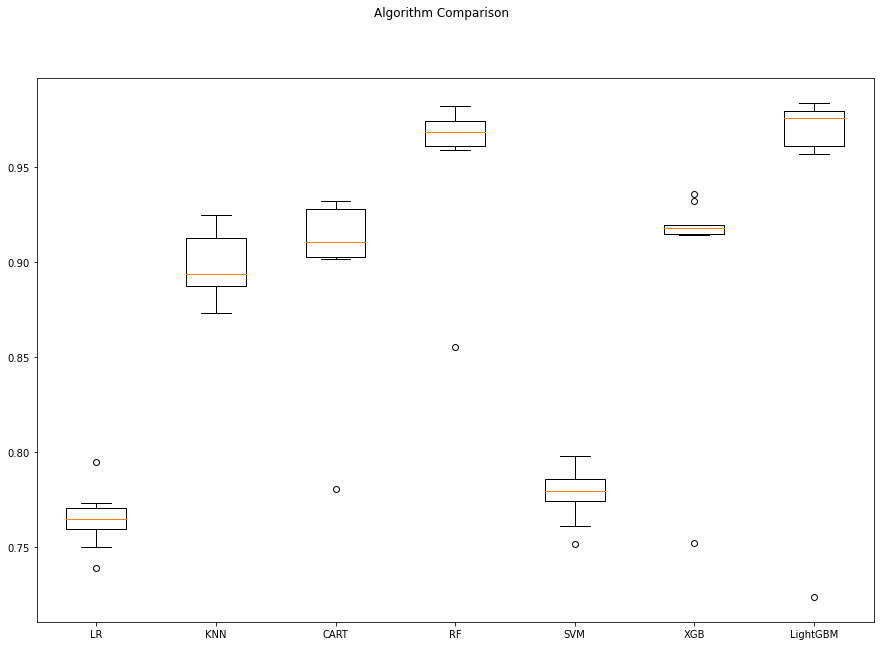

In [126]:
#listing all the models for test
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

results = []
names = []

#perform cross validation on all the models
for name, model in models:
    
    kfold = KFold(n_splits = 10)
        
    cv_results = cross_val_score(model, X_res, y_res, cv = 10, scoring= "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
        
#visualising the cross validation score on boxplot
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation**: The top 3 models are Random Forest, LightGBM and XGBoost

## Random Forest

In [214]:
rf = RandomForestClassifier(criterion= 'gini', n_estimators=200, random_state=12345, max_features= 7, min_samples_split= 30, max_depth= 8)
rf.fit(X_res,y_res)
pred = rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1206
           1       0.14      0.46      0.21        71

    accuracy                           0.81      1277
   macro avg       0.55      0.64      0.55      1277
weighted avg       0.92      0.81      0.85      1277



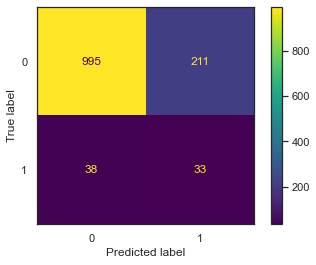

In [215]:
cm = confusion_matrix(y_test, pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

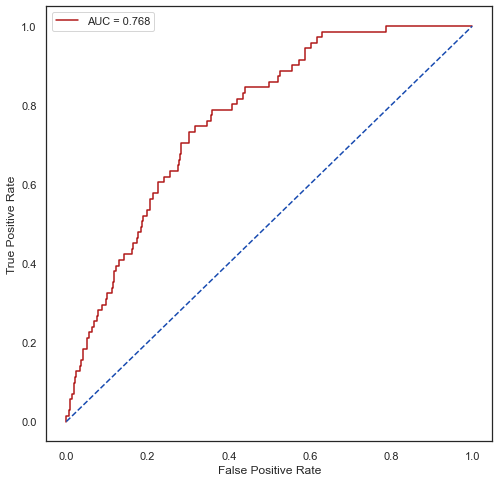

In [217]:
y_prob = rf.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1206
           1       0.13      0.66      0.22        71

    accuracy                           0.74      1277
   macro avg       0.55      0.70      0.53      1277
weighted avg       0.93      0.74      0.81      1277



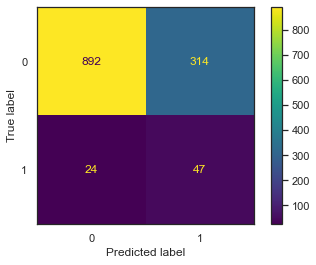

In [218]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.005)
xgb.fit(X_res, y_res)
y_pred = xgb.predict(x_test)
y_prob = xgb.predict_proba(x_test)[:,1]
cm_xgb = confusion_matrix(y_test, y_pred, labels=xgb.classes_)

print(classification_report(y_test,y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot()
plt.show()

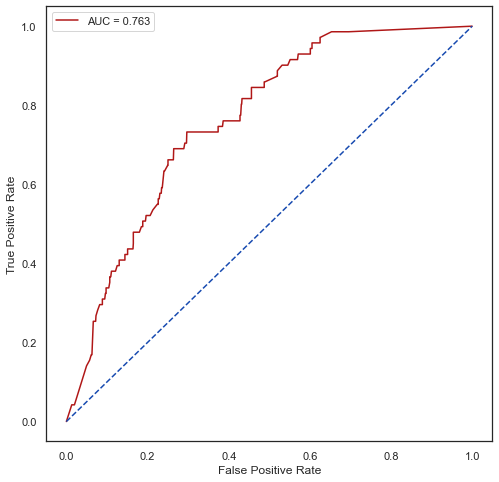

In [219]:
y_prob = xgb.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## LGBMClassifier

              precision    recall  f1-score   support

           0       0.99      0.64      0.77      1206
           1       0.12      0.85      0.21        71

    accuracy                           0.65      1277
   macro avg       0.55      0.74      0.49      1277
weighted avg       0.94      0.65      0.74      1277



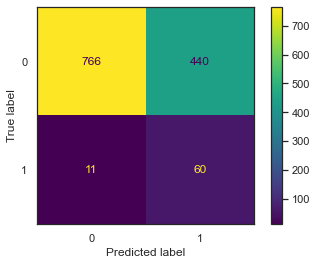

In [222]:
lgbm = LGBMClassifier(learning_rate= 0.0007, n_estimators= 500, max_depth= 3)
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(x_test)
y_prob = lgbm.predict_proba(x_test)[:,1]
cm_lgbm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)

print(classification_report(y_test,y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=lgbm.classes_)
disp.plot()
plt.show()

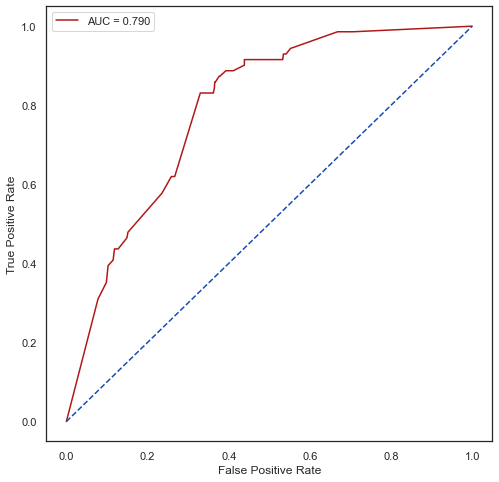

In [223]:
y_prob = lgbm.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

**Observation**: After adjusting the hyperparameters, LGBMClassifier has the highest recall for true values at 0.85 and AUC score of 0.79, highest among the 3 models